In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime,date
import plotly.express as px

In [2]:
df=pd.read_csv('../data/Customer_Trans_RFM_Analysis.csv')
df1=pd.read_csv('../data/CustomerAddress.csv')

In [3]:
df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_Group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Silver,70,Almost Lost Customer,9
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,6,4965.43,2,2,4,224,Silver,50,Loosing Customer,7
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,7,3983.97,1,3,3,133,Bronze,70,Almost Lost Customer,9
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,10,6646.00,2,4,4,244,Silver,30,Loosing Customer,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19542 entries, 0 to 19541
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19542 non-null  int64  
 1   product_id                           19542 non-null  int64  
 2   customer_id                          19542 non-null  int64  
 3   transaction_date                     19542 non-null  object 
 4   online_order                         19542 non-null  float64
 5   order_status                         19542 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19542 non-null  float64
 11  standard_cost               

In [5]:
columns_list = df.columns.tolist()
print(columns_list)

['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date', 'Profit', 'full_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'Age', 'recency', 'frequency', 'monetary', 'r_quartile', 'f_quartile', 'm_quartile', 'rfm_score', 'customer_title', 'Age_Group', 'detail_cust_title', 'rank']


In [6]:
data_rfm=['customer_id','full_name','r_quartile', 'f_quartile', 'm_quartile', 'rfm_score', 'customer_title','detail_cust_title', 'rank']
frame_rfm =pd.DataFrame(df[data_rfm])
frame_rfm.head()

,customer_id,full_name,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,detail_cust_title,rank
0,2950,Kristos Anthony,2,1,1,211,Silver,Almost Lost Customer,9
1,3120,Lauree O'Donnell,3,3,4,334,Gold,Potential Customer,5
2,402,Berne Donegan,2,2,4,224,Silver,Loosing Customer,7
3,3135,Titus Worsall,1,3,3,133,Bronze,Almost Lost Customer,9
4,787,Norma Batrim,2,4,4,244,Silver,Loosing Customer,7


In [7]:
frame_rfm['detail_cust_title'].unique()

array(['Almost Lost Customer', 'Potential Customer', 'Loosing Customer',
       'Platinum Customer', 'Evasive Customer', 'Late Bloomer',
       'Recent Customer', 'Becoming Loyal', 'High Risk Customer',
       'Lost Customer', 'Very Loyal'], dtype=object)

In [14]:
cluster=frame_rfm[['r_quartile', 'f_quartile', 'm_quartile']]


In [15]:
cluster.min()

r_quartile    1
f_quartile    1
m_quartile    0
dtype: int64

# K-Means Algorithm

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

cluster_transformed = cluster + 1e-6

# Take the logarithm transformation
cluster_log = np.log(cluster_transformed)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_normalized = scaler.fit_transform(cluster_log)

# Convert the normalized data back to a DataFrame
data_normalized = pd.DataFrame(data=data_normalized, index=cluster.index, columns=cluster.columns)



In [20]:
data_normalized

,r_quartile,f_quartile,m_quartile
0,-0.360671,-1.773676,-0.000857
1,0.459765,0.464669,0.382703
2,-0.360671,-0.361438,0.382703
3,-1.763217,0.464669,0.303107
4,-0.360671,1.050801,0.382703
...,...,...,...
19537,0.459765,-0.361438,0.190923
19538,0.459765,1.050801,0.303107
19539,0.459765,0.464669,0.382703
19540,-0.360671,-1.773676,-3.823333


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k5 = cluster.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'r_quartile': 'mean',
    'f_quartile': 'mean',
    'm_quartile': ['mean', 'count']
  }).round(1)


r_quartile f_quartile m_quartile      
              mean       mean       mean count
Cluster                                       
0              3.1        3.7        3.4  8129
1              1.3        2.0        2.4  5102
2              3.5        2.0        2.5  3027
3              2.7        3.0        0.0  1232
4              2.9        1.0        1.7  2052

**To find which ‘k’ value is more suitable for our data we will use elbow method.**

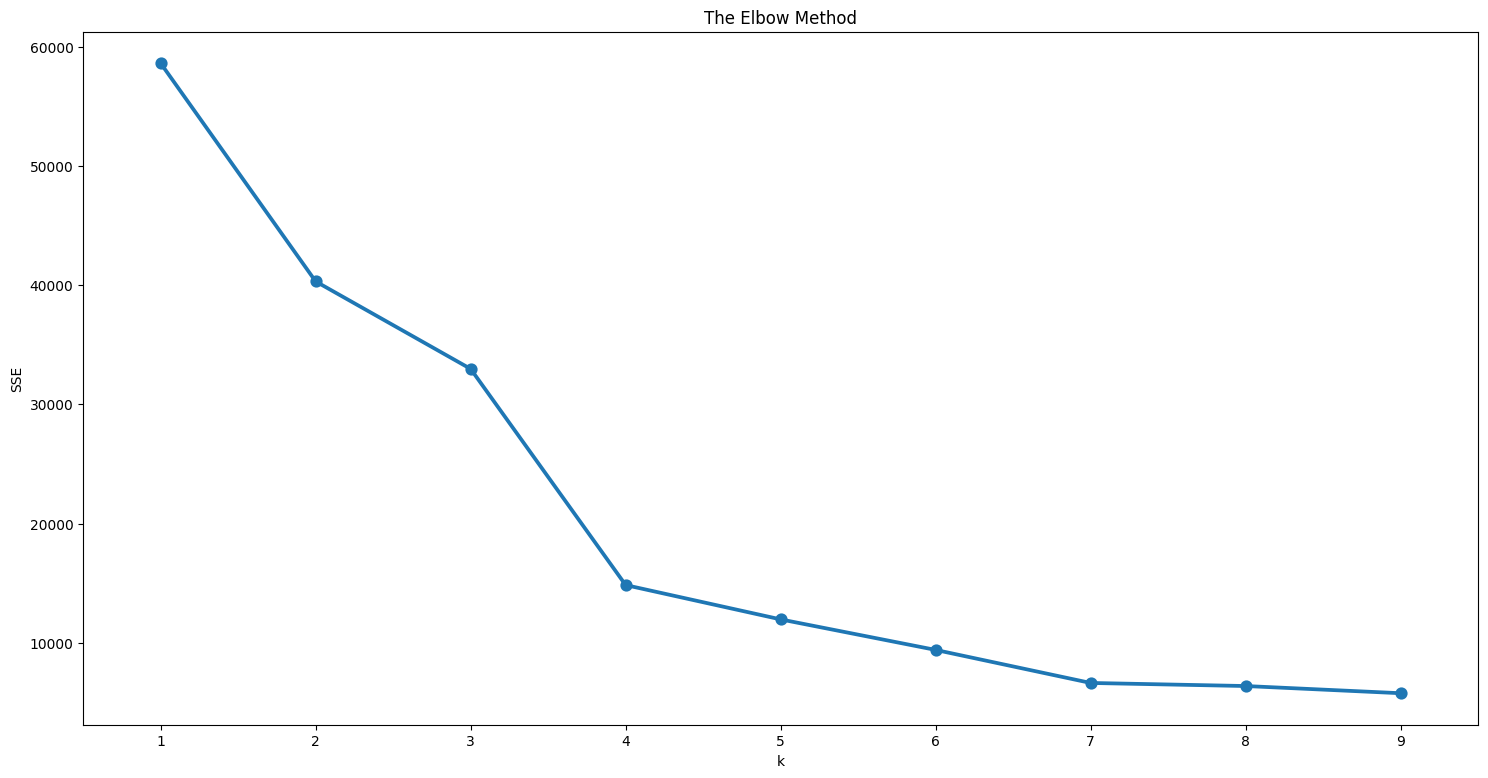

In [26]:
sse = {}
kmeans_models = {}
for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
    kmeans_models[k] = kmeans
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**After K=7 the Elbow Curve is Almost Flat**

For n_clusters = 2 The average silhouette_score is : 0.41959164829896395
For n_clusters = 4 The average silhouette_score is : 0.5020414501229357
For n_clusters = 6 The average silhouette_score is : 0.5499619744662462
For n_clusters = 8 The average silhouette_score is : 0.5198471829220003
For n_clusters = 10 The average silhouette_score is : 0.5293279810071253


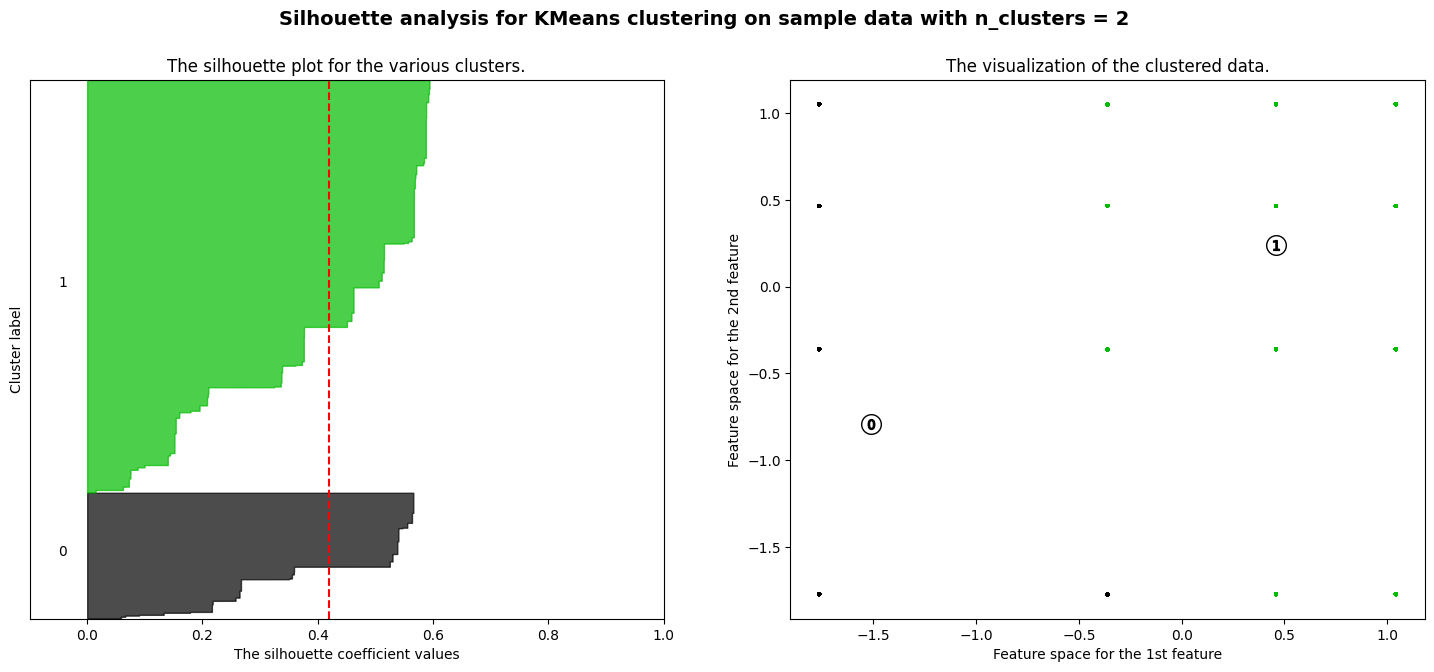

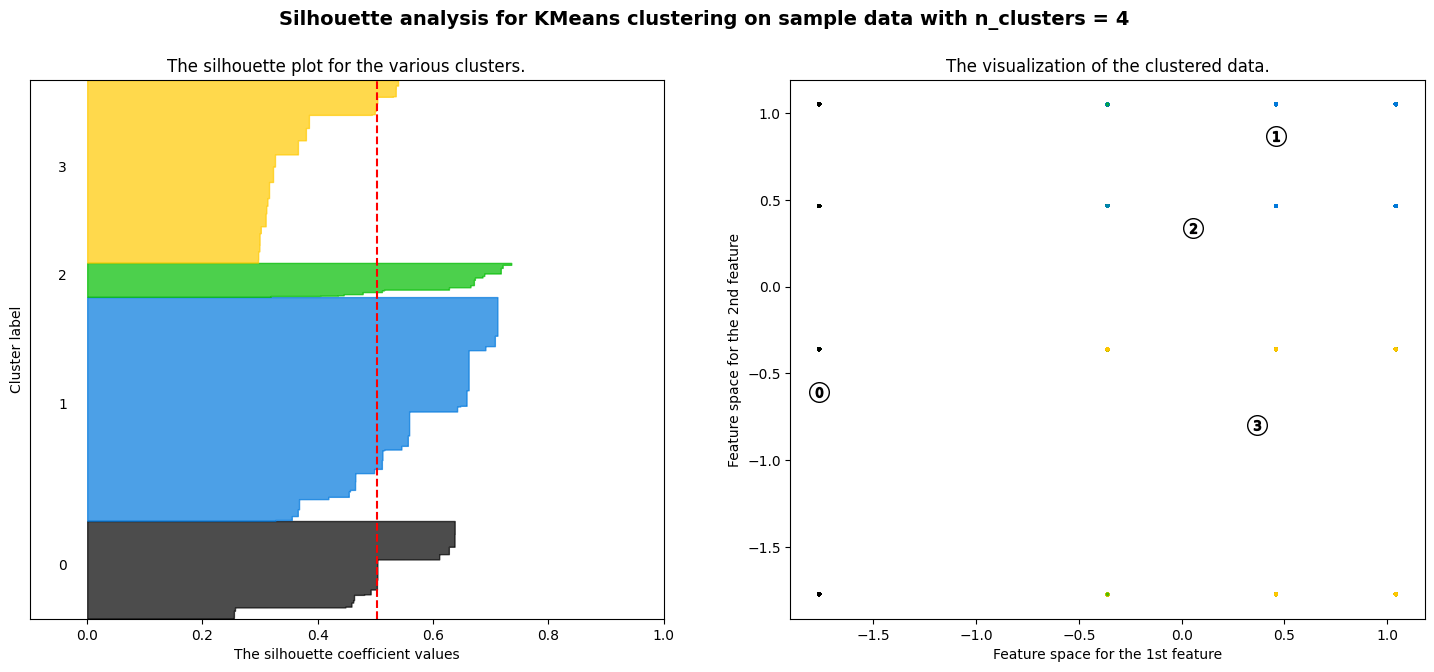

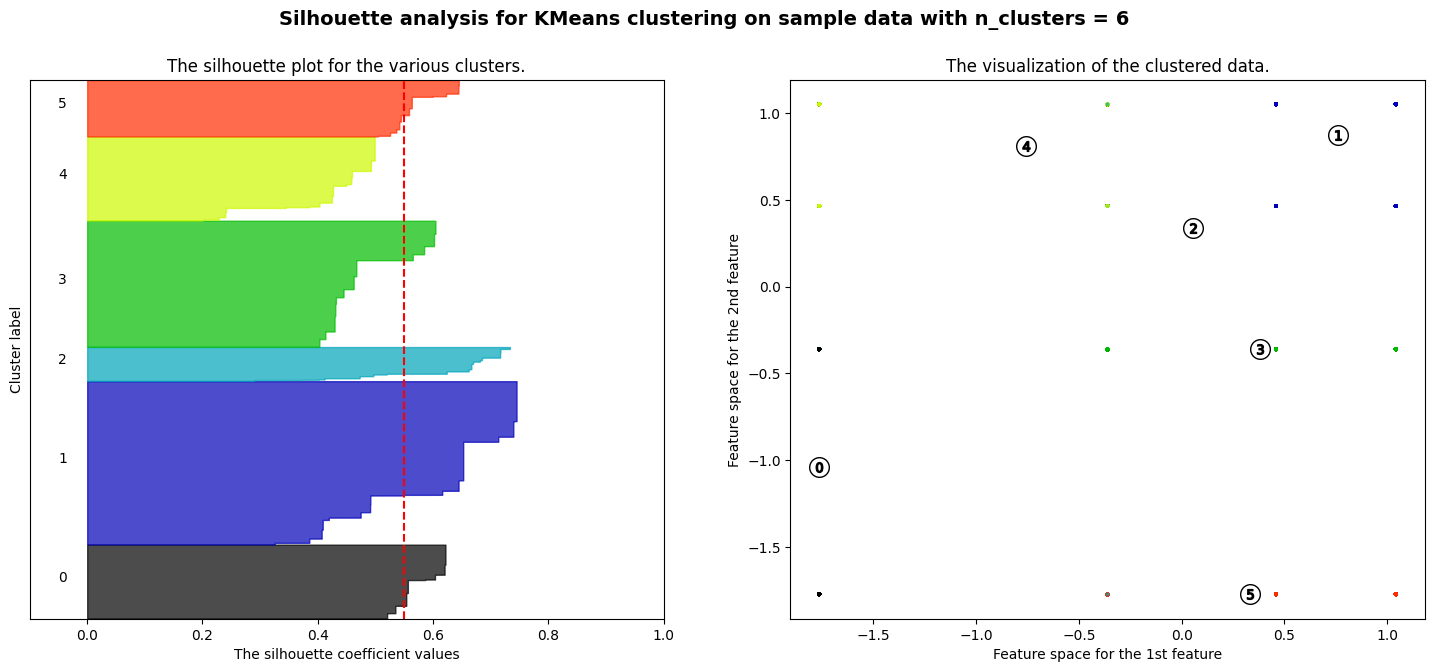

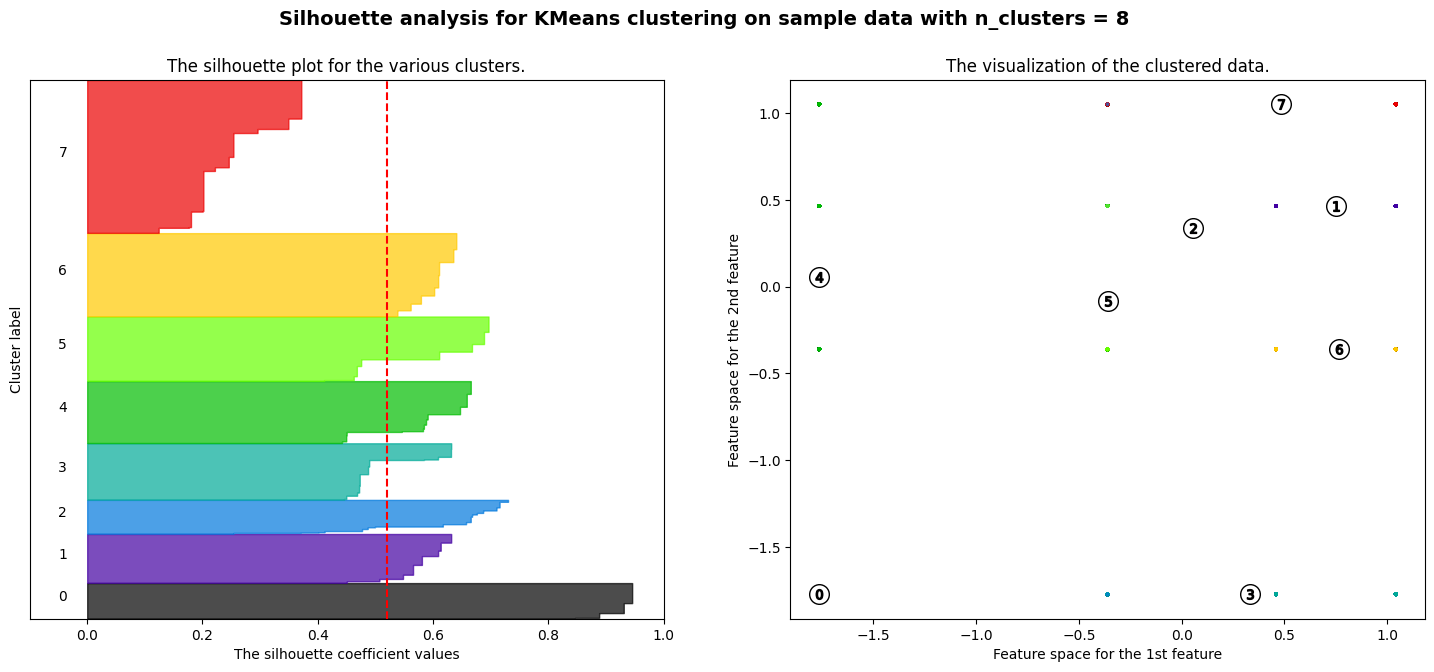

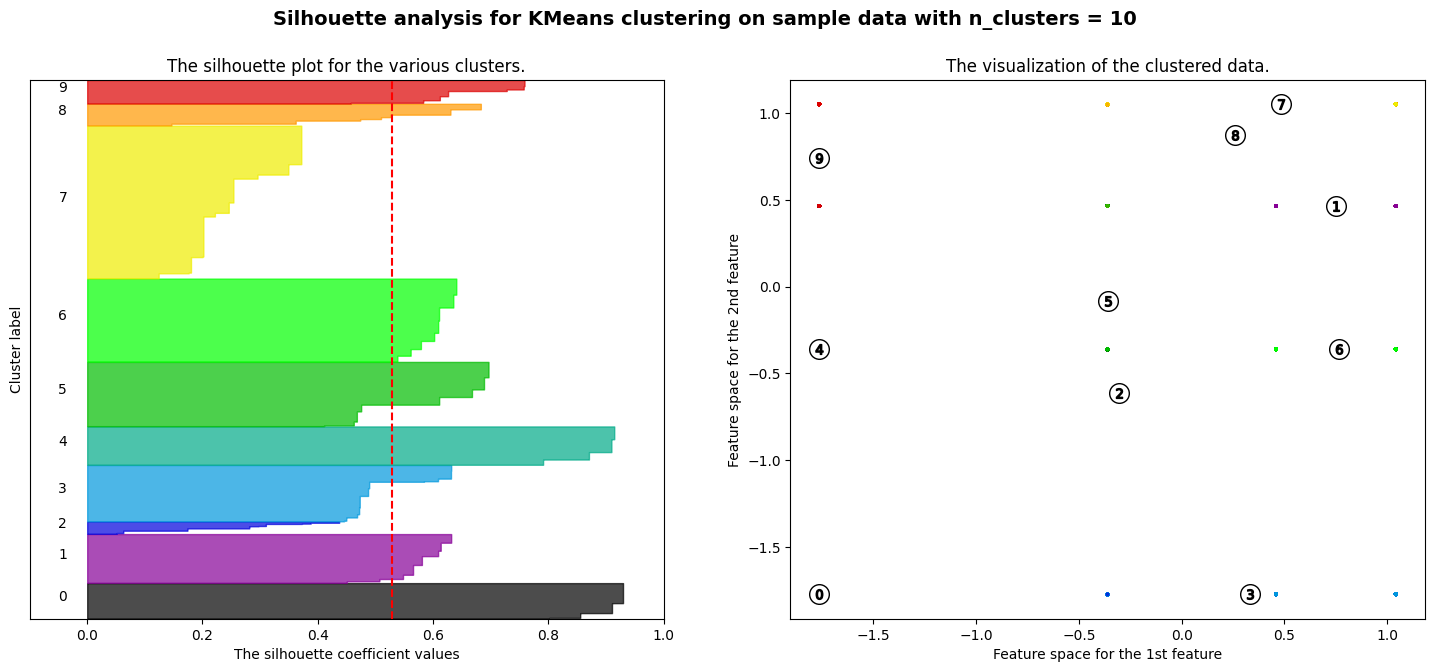

In [31]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [2, 4, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_normalized) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_normalized)

    silhouette_avg = silhouette_score(data_normalized, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(data_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters, fontsize=14, fontweight="bold")

plt.show()


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k7 = cluster.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'r_quartile': 'mean',
    'f_quartile': 'mean',
    'm_quartile': ['mean', 'count']
  }).round(1)

r_quartile f_quartile m_quartile      
              mean       mean       mean count
Cluster                                       
0              3.2        3.8        3.4  7345
1              2.0        2.3        2.8  2343
2              3.5        2.0        2.5  3027
3              2.7        3.0        0.0  1232
4              2.9        1.0        1.7  2052
5              1.0        2.6        2.8  2254
6              1.0        1.0        1.6  1289

## Calculate relative importance of each attribute

In [37]:
cluster_avg = data_rfm_k7.groupby(['Cluster']).mean() 
population_avg = cluster.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,r_quartile,f_quartile,m_quartile
Cluster,,,
0,0.21,0.41,0.31
1,-0.25,-0.12,0.05
2,0.33,-0.25,-0.03
3,0.02,0.14,-1.00
4,0.10,-0.62,-0.35
5,-0.62,-0.04,0.07
6,-0.62,-0.62,-0.39


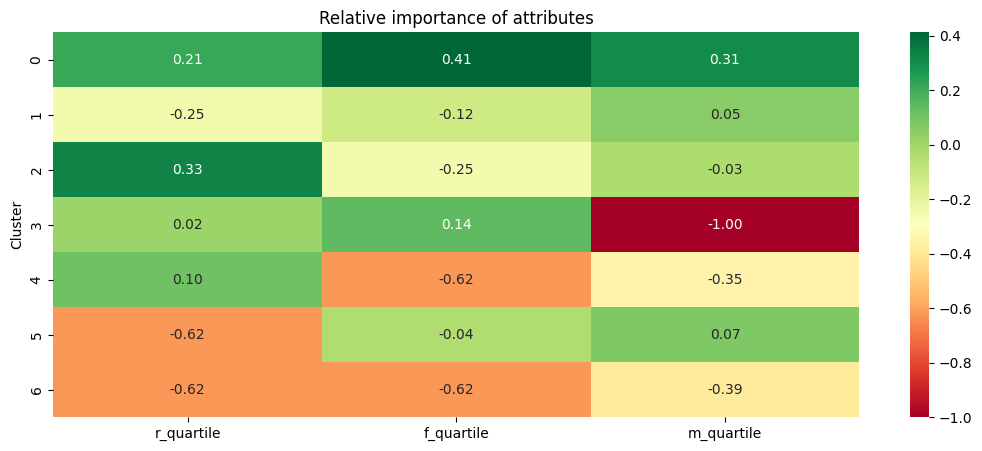

In [38]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

### Cluster Analysis Results:

#### Cluster 0:
- **r_quartile:** 0.21
- **f_quartile:** 0.41
- **m_quartile:** 0.31

#### Business Perspective:
- Customers in this cluster have relatively high recency, frequency, and monetary value compared to the overall population.
- They are recent and frequent buyers who contribute significantly to the company's revenue.
- Targeted marketing strategies can be implemented to retain these valuable customers, such as loyalty programs or personalized promotions.

#### Cluster 1:
- **r_quartile:** -0.25
- **f_quartile:** -0.12
- **m_quartile:** 0.05

#### Business Perspective:
- Customers in this cluster have slightly below-average recency and frequency but contribute slightly above-average monetary value.
- They may require incentives or discounts to increase their frequency of purchases.
- Implementing targeted campaigns to increase their engagement and loyalty can be beneficial.

#### Cluster 2:
- **r_quartile:** 0.33
- **f_quartile:** -0.25
- **m_quartile:** -0.03

#### Business Perspective:
- Customers in this cluster exhibit high recency but low frequency and monetary value.
- They may be recent customers who have made only a few purchases.
- Engaging them with special offers or product recommendations based on their recent purchases can increase their loyalty and overall spending.

#### Cluster 3:
- **r_quartile:** 0.02
- **f_quartile:** 0.14
- **m_quartile:** -1.00

#### Business Perspective:
- Customers in this cluster have average recency and frequency but significantly low monetary value.
- They may be occasional buyers who make small purchases.
- Strategies to upsell or cross-sell complementary products can help increase their average order value and overall spending.

#### Cluster 4:
- **r_quartile:** 0.10
- **f_quartile:** -0.62
- **m_quartile:** -0.35

#### Business Perspective:
- Customers in this cluster have average recency but low frequency and monetary value.
- They may be occasional buyers with low engagement.
- Targeted promotions or product recommendations can encourage them to make more frequent purchases.

#### Cluster 5:
- **r_quartile:** -0.62
- **f_quartile:** -0.04
- **m_quartile:** 0.07

#### Business Perspective:
- Customers in this cluster have low recency but slightly above-average frequency and monetary value.
- They may be loyal customers who make frequent purchases but have not made recent transactions.
- Re-engagement strategies such as personalized offers or reminders can help retain their loyalty.

#### Cluster 6:
- **r_quartile:** -0.62
- **f_quartile:** -0.62
- **m_quartile:** -0.39

#### Business Perspective:
- Customers in this cluster have low recency, frequency, and monetary value.
- They may be inactive or lost customers who require reactivation efforts.
- Targeted win-back campaigns or special incentives can be used to re-engage these customers and bring them back to making purchases.
